In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Model-specific imports:
from sklearn.linear_model import LinearRegression

In [3]:
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-2.xlsx', engine='openpyxl')

inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [4]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

cor = inputData.corr()
#Correlation with output variable
cor_target = abs(cor["Age"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features


Left-Thalamus                        0.696598
3rd-Ventricle                        0.616427
Left-Hippocampus                     0.601390
Left-Amygdala                        0.612836
Left-choroid-plexus                  0.630961
Right-Thalamus                       0.677696
Right-Putamen                        0.620966
Right-Accumbens-area                 0.658007
lhCortexVol                          0.657288
rhCortexVol                          0.656251
CortexVol                            0.658139
SubCortGrayVol                       0.676319
TotalGrayVol                         0.668308
lh_inferiorparietal_thickness        0.629624
lh_parsopercularis_thickness         0.640510
lh_parstriangularis_thickness        0.635172
lh_postcentral_thickness             0.606031
lh_precentral_thickness              0.638825
lh_precuneus_thickness               0.634651
lh_rostralmiddlefrontal_thickness    0.648759
lh_superiorfrontal_thickness         0.695692
lh_superiortemporal_thickness     

In [5]:
# re-initializing data with features that have a score >0.6
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-newest.xlsx', engine='openpyxl')

inputData.head()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
0,1,6855.5,2034.4,3443.0,1259.4,984.1,6420.7,4396.6,306.9,211232.5198,...,2.277,2.551,2.404,1.872,2.445,2.147,2.597,2.408,2.33635,85
1,2,6835.1,1927.1,3479.4,1298.6,966.6,6981.2,4504.1,336.4,213515.0486,...,2.300,2.572,2.431,1.937,2.503,2.196,2.597,2.417,2.34202,85
2,3,7566.0,2064.7,3385.2,1279.6,1020.3,7088.3,4461.0,306.4,212234.1905,...,2.248,2.585,2.455,1.904,2.405,2.176,2.607,2.374,2.31982,86
3,4,8004.6,2017.7,3311.5,1211.5,901.9,7687.1,3979.8,271.1,203358.7451,...,2.271,2.545,2.347,1.866,2.375,2.144,2.507,2.366,2.29215,87
4,5,6677.4,2251.8,3220.8,1244.8,1089.0,7153.5,4353.2,320.8,207834.7973,...,2.314,2.537,2.318,1.891,2.419,2.079,2.478,2.381,2.30397,89


In [6]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns= ['Age'])
y = inputData['Age']
# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature 0: 910.164609
Feature 1: 3085.579532
Feature 2: 2030.985774
Feature 3: 1888.088471
Feature 4: 1996.421148
Feature 5: 2222.751622
Feature 6: 2781.553213
Feature 7: 2028.826407
Feature 8: 2534.123525
Feature 9: 2532.674011
Feature 10: 2516.308856
Feature 11: 2544.124108
Feature 12: 2726.379883
Feature 13: 2668.087775
Feature 14: 2246.747273
Feature 15: 2354.345901
Feature 16: 2024.836496
Feature 17: 2363.188808
Feature 18: 2358.220919
Feature 19: 2453.083436
Feature 20: 3128.054210
Feature 21: 2880.167009
Feature 22: 2561.161022
Feature 23: 3375.613430
Feature 24: 2459.930968
Feature 25: 2459.265519
Feature 26: 3014.087215
Feature 27: 1975.236635
Feature 28: 2115.345816
Feature 29: 2241.828908
Feature 30: 2776.725420
Feature 31: 2734.773920
Feature 32: 3405.825092


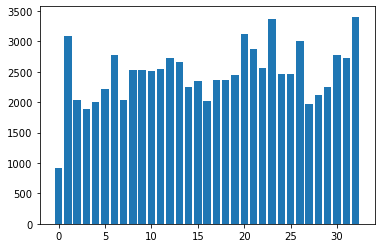

In [7]:
#graphing feature scores (features with larger column are more important)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as pyplot
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [8]:
import numpy as np
from sklearn.feature_selection import f_regression

k = 10    # number of best features to obtain

indices = np.argsort(fs.scores_)[::-1]
#printing best features from first to last
print(indices)

[32 23 20  1 26 21  6 30 31 12 13 22 11  8  9 10 24 25 19 17 18 15 14 29
  5 28  2  7 16  4 27  3  0]


In [9]:
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os
inputData.corr()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
S.No,1.000000,0.355100,-0.323219,0.370375,0.459095,-0.279971,0.490407,0.373858,0.378544,0.397144,...,0.499675,0.419945,0.435160,0.516816,0.509855,0.464316,0.429315,0.482818,0.551083,-0.448086
Left-Thalamus,0.355100,1.000000,-0.406120,0.742072,0.677330,-0.438474,0.909240,0.672992,0.560422,0.739606,...,0.500260,0.495569,0.498658,0.470322,0.421876,0.460434,0.470515,0.508498,0.520636,-0.696598
3rd-Ventricle,-0.323219,-0.406120,1.000000,-0.331450,-0.336555,0.710784,-0.358931,-0.282654,-0.433445,-0.251124,...,-0.491205,-0.435916,-0.510964,-0.423329,-0.452654,-0.503078,-0.518317,-0.493954,-0.507112,0.616427
Left-Hippocampus,0.370375,0.742072,-0.331450,1.000000,0.782702,-0.368454,0.734812,0.636997,0.593081,0.697834,...,0.447970,0.460208,0.437268,0.463632,0.417402,0.438606,0.430650,0.471767,0.509885,-0.601390
Left-Amygdala,0.459095,0.677330,-0.336555,0.782702,1.000000,-0.354736,0.711494,0.644764,0.611783,0.695496,...,0.480708,0.493964,0.451708,0.474580,0.458792,0.450822,0.457801,0.496701,0.535964,-0.612836
Left-choroid-plexus,-0.279971,-0.438474,0.710784,-0.368454,-0.354736,1.000000,-0.380079,-0.312257,-0.424564,-0.261279,...,-0.501668,-0.424357,-0.492985,-0.437481,-0.445470,-0.478938,-0.516429,-0.503942,-0.514694,0.630961
Right-Thalamus,0.490407,0.909240,-0.358931,0.734812,0.711494,-0.380079,1.000000,0.673963,0.548648,0.766735,...,0.547809,0.532313,0.505537,0.522971,0.475090,0.496320,0.499253,0.550517,0.579179,-0.677696
Right-Putamen,0.373858,0.672992,-0.282654,0.636997,0.644764,-0.312257,0.673963,1.000000,0.668210,0.719127,...,0.463887,0.479452,0.466129,0.444167,0.453377,0.426866,0.463423,0.482041,0.523153,-0.620966
Right-Accumbens-area,0.378544,0.560422,-0.433445,0.593081,0.611783,-0.424564,0.548648,0.668210,1.000000,0.629430,...,0.457280,0.467304,0.478364,0.448640,0.477793,0.431929,0.427612,0.486130,0.519841,-0.658007
lhCortexVol,0.397144,0.739606,-0.251124,0.697834,0.695496,-0.261279,0.766735,0.719127,0.629430,1.000000,...,0.593946,0.606405,0.561880,0.592039,0.561944,0.525942,0.531112,0.606066,0.659920,-0.657288


In [10]:
# instantiate a linear regression model using sklearn:
myLinReg = LinearRegression()

# fit the model to the training data
myLinReg.fit(X_train_fs, y_train)

LinearRegression()

In [11]:
# check the model's performance on unseen, test data
predictions = myLinReg.predict(X_test_fs)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.7722267857799854
mean absolute error (years): 7.840909688753299
mean square error: 95.64879347403561
root mean absolute error (years): 9.7800201162388


/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

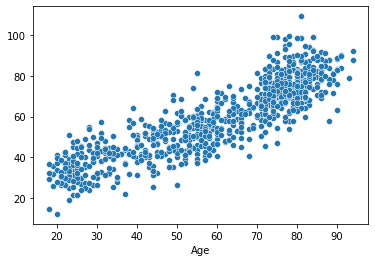

In [12]:
sns.scatterplot(y_test, predictions)

In [ ]:
# fairly linear plot (linear fit would be ok)